<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


,age,sex,bmi,children,smoker,region,charges,female,male,non-smoker,...,southeast,southwest,female,male,non-smoker,nicotian,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0,...,0,1,1,0,0,1,0,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,0,1,1,...,1,0,0,1,1,0,0,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,1,...,1,0,0,1,1,0,0,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,1,...,0,0,0,1,1,0,0,1,0,0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,1,...,0,0,0,1,1,0,0,1,0,0
5,31,female,25.740,0,no,southeast,3756.62160,1,0,1,...,1,0,1,0,1,0,0,0,1,0
6,46,female,33.440,1,no,southeast,8240.58960,1,0,1,...,1,0,1,0,1,0,0,0,1,0
7,37,female,27.740,3,no,northwest,7281.50560,1,0,1,...,0,0,1,0,1,0,0,1,0,0
8,37,male,29.830,2,no,northeast,6406.41070,0,1,1,...,0,0,0,1,1,0,1,0,0,0
9,60,female,25.840,0,no,northwest,28923.13692,1,0,1,...,0,0,1,0,1,0,0,1,0,0


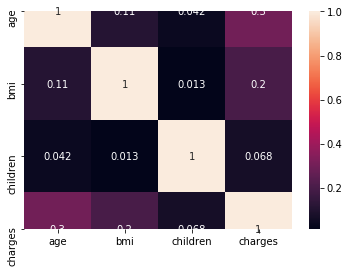

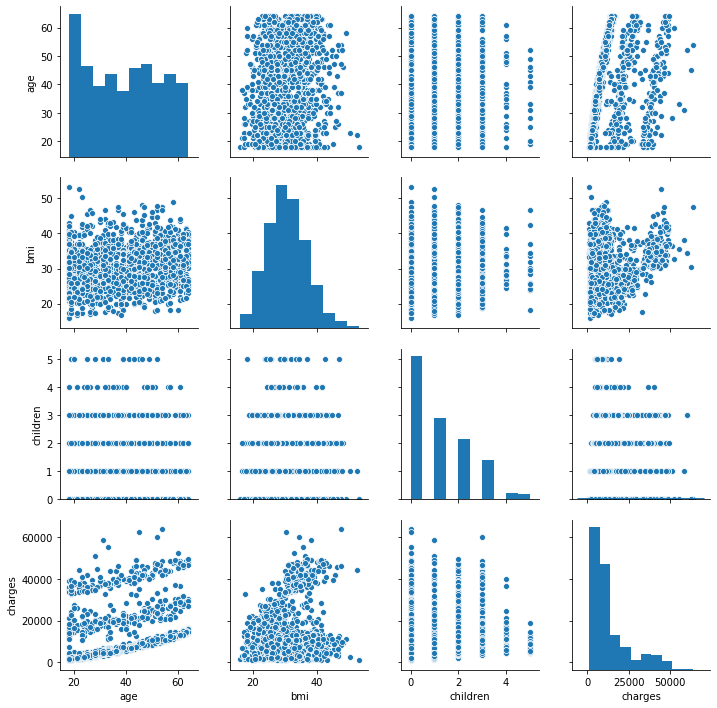

In [25]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
df = pd.read_csv('insurance.csv')
df.info()
df.columns
df.corr()

display(df.head(10))

sns.heatmap(df.corr(),annot=True)

sns.pairplot(df)
sns.distplot(df["charges"])

sex_dummy = pd.get_dummies(df['sex'])
smoker_dummy = pd.get_dummies(df['smoker'])
region_dummy = pd.get_dummies(df['region'])

df = pd.concat([df,sex_dummy,smoker_dummy,
                    region_dummy], axis=1)

df.rename(columns={'no': 'non-smoker',
              'yes': 'nicotian'}, inplace=True)
    
sex_dummy = pd.get_dummies(df['sex'])
smoker_dummy = pd.get_dummies(df['smoker'])
region_dummy = pd.get_dummies(df['region'])

df = pd.concat([df,sex_dummy,smoker_dummy,
                    region_dummy], axis=1)

df.rename(columns={'no': 'non-smoker',
              'yes': 'nicotian'}, inplace=True)

display(df.head(10))





In [26]:
X = df[['age', 'bmi', 'children','female','male','non-smoker','nicotian','northeast','northwest','southeast','southwest',]]

y = df['charges'] #y = np.log(df['charges'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)
lm = LinearRegression()
lm.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
print(lm.intercept_)

coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])

print(coeff_df)

predictions = lm.predict(X_test)
print("Predicted medical costs values:", predictions)

-563.8566875612178
            Coefficient
age          281.004552
bmi          299.877247
children     532.062537
female         4.013923
female         4.013923
male          -4.013923
male          -4.013923
non-smoker -6029.832643
non-smoker -6029.832643
nicotian    6029.832643
nicotian    6029.832643
northeast    350.487270
northeast    350.487270
northwest    127.635549
northwest    127.635549
southeast   -450.518852
southeast   -450.518852
southwest    -27.603966
southwest    -27.603966
Predicted medical costs values: [ 8566.54852643  1794.18446536 30555.8723401  12486.06904634
  5131.6257605   8716.52919629  6204.19436496  2082.41215389
  8661.77068547 14568.68116667  8550.65322964 31241.04154506
 31863.11000721  6165.04018573  7287.23564818   942.70179112
 34325.22803297 11818.61198473  -912.19946537 12587.04939123
 31363.17120668 11884.82918656 13414.90143738 29384.32037417
 35410.20549717 11185.71545171 11904.0614552   3177.34159063
  7411.04161284  1138.48546579 18547.83106

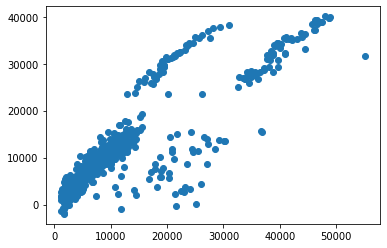

In [28]:
plt.scatter(y_test, predictions)

4172.322441210717
38200972.994506225


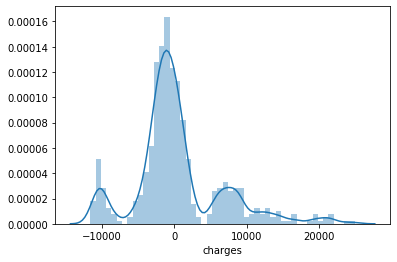

In [29]:
sns.distplot((y_test-predictions), bins=50)

print(metrics.mean_absolute_error(y_test, predictions))
print(metrics.mean_squared_error(y_test, predictions))
